# **Bharat Intern  Data Science Internship Task-1**


---


* Created Date:15.03.2024
* Created By: Blessy Louis
* edited on:15.03.2024

**AIM:**Develop a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python

Import Libraries

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

Load Dataset

In [ ]:
data = pd.read_csv("train.csv")
data

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.isnull().sum()

sms      0
label    0
dtype: int64

In [ ]:
data.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Data preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data['cleaned_sms'] = data['sms'].apply(preprocess_text)
data['cleaned_sms']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                           pity mood soany suggestion
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: cleaned_sms, Length: 5574, dtype: object


# Feature extraction


In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# Model selection


In [ ]:
model = SVC(kernel='linear')

# Train-test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_sms'], data['label'], test_size=0.2, random_state=42)

# Model training


In [ ]:
pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('svm', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC(kernel='linear'))])

# Model evaluation


In [ ]:
predictions = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       954
           1       0.97      0.90      0.93       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<ipython-input-16-bff039cb9d3f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette=palette)
<ipython-input-16-bff039cb9d3f>:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x='label', data=data, palette=palette)


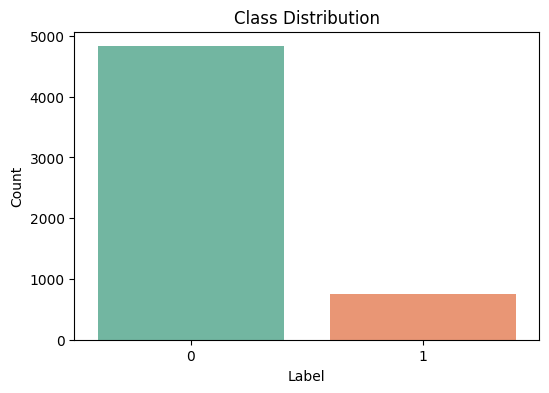

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define color palette
palette = sns.color_palette("Set2")

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette=palette)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()





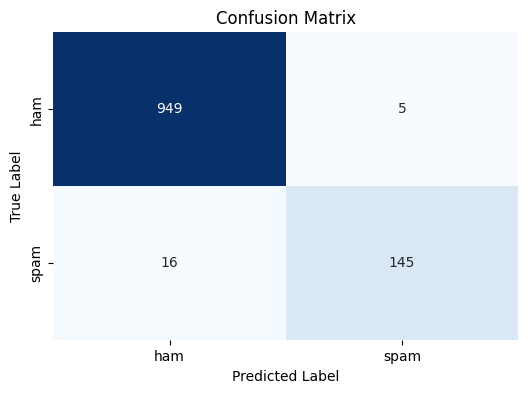

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Count the number of spam and non-spam messages
spam_count = len(data[data['label'] == 1])
ham_count = len(data[data['label'] == 0])
print("Spam count:", spam_count)
print("Ham count:", ham_count)


Spam count: 747
Ham count: 4827


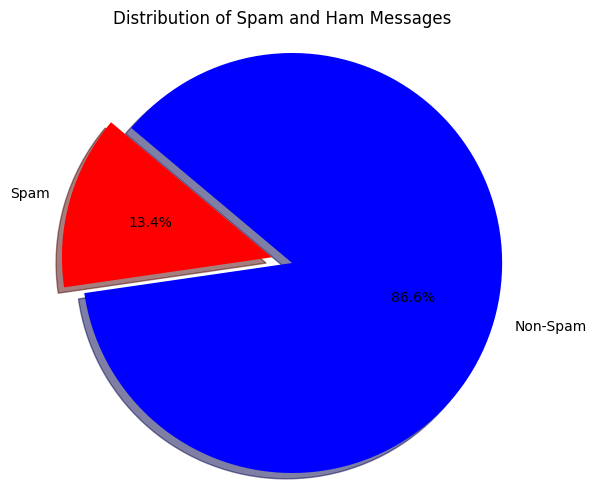

In [ ]:
# Plot
plt.figure(figsize=(6, 6))
labels = ['Spam', 'Non-Spam']
sizes = [spam_count, ham_count]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode the 1st slice (Spam)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Spam and Ham Messages')
plt.show()

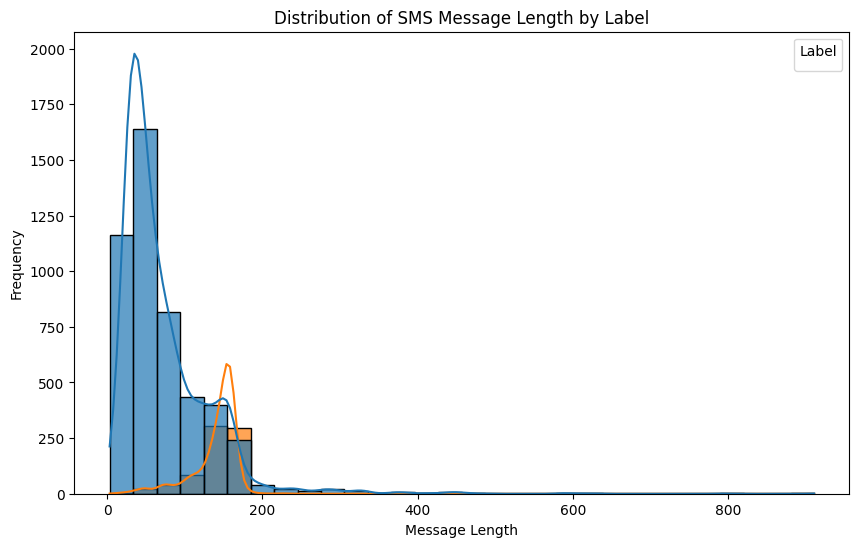

In [ ]:
# Calculate the length of each SMS message
data['sms_length'] = data['sms'].apply(len)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sms_length', hue='label', bins=30, kde=True, alpha=0.7)
plt.title('Distribution of SMS Message Length by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()
